In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원축소(n=2,5,10)

In [64]:
pca = PCA(n_components=2)
cancer_pca2 = pca.fit_transform(cancer_std)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['PC1'] = cancer_pca2[:,0]
df['PC2'] = cancer_pca2[:,1]
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174


In [46]:
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)


In [47]:
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)


- 분류정확도

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
# 원본
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [50]:
# 함수 만들기

def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y , stratify=cancer.target, random_state=2021
    )
    rfc = RandomForestClassifier(random_state=2021)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return np.round(score, 4)

In [65]:
print('PCA2 정확도:', pca_accuracy(cancer_pca2, cancer.target))
print('PCA5 정확도:', pca_accuracy(cancer_pca5, cancer.target))
print('PCA10 정확도:', pca_accuracy(cancer_pca10, cancer.target))
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA2 정확도: 0.9441
PCA5 정확도: 0.965
PCA10 정확도: 0.972
원데이터 정확도: 0.979


- globals(): 전역변수를 딕셔너리에 담아두기

In [67]:
for dim in [2,5,10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancer_pca{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancer_pca{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.965
PCA 10 정확도: 0.972
원데이터 정확도: 0.979


- n=2 시각화

In [55]:
df['target'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174,0


In [56]:
df.groupby(['target']).count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2
target,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


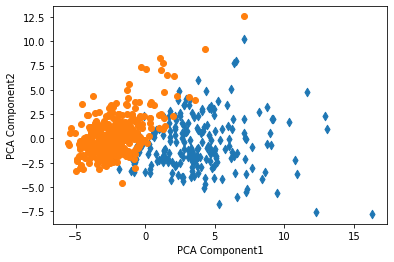

In [57]:
markers = ['d', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component1'); plt.ylabel('PCA Component2')
plt.show()

- 군집화

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(cancer_std)

KMeans(n_clusters=3, random_state=2021)

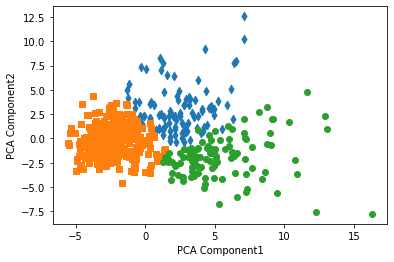

In [59]:
df['cluster'] = kmeans.labels_
markers = ['d', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component1'); plt.ylabel('PCA Component2')
plt.show()

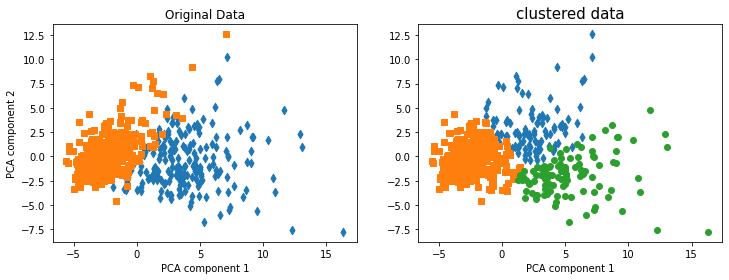

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]

    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column]== i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker)

    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA component 2')
        
    else:           
        ax.set_title('clustered data', fontsize=15)
    ax.set_xlabel('PCA component 1')
plt.show()

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(cancer_std, df.cluster)
df['실루엣계수'] = score_samples
silhouette_score(cancer_std, df.cluster)

0.3143840098608098

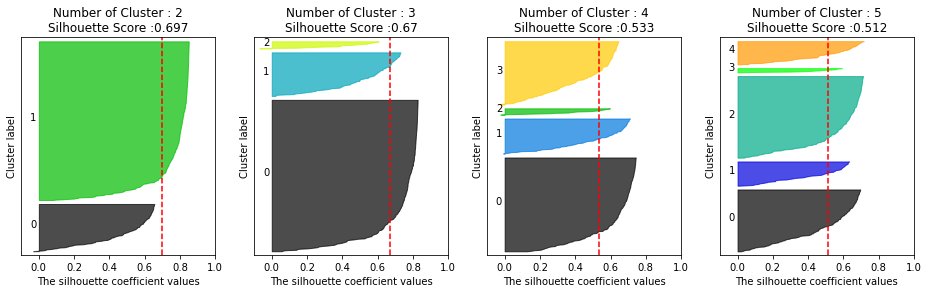

In [62]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], cancer.data)